<a href="https://colab.research.google.com/github/ugurklc/Deep_Learning/blob/Master/Natural_Language_Processing/Sarcasm_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import tensorflow as tf
import json
from bs4 import BeautifulSoup
import string
import numpy as np

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
# Get the data

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json

--2023-02-26 17:34:06--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2023-02-26 17:34:06 (54.9 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [7]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

In [12]:
# Remove HTML tags, punctuatins and stopwords

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

sentences = []
labels = []
urls = []

for item in datastore:
  sentence = item['headline'].lower()
  sentence = sentence.replace(",", " , ")
  sentence = sentence.replace(".", " . ")
  sentence = sentence.replace("-", " - ")
  sentence = sentence.replace("/", " / ")
  soup = BeautifulSoup(sentence)
  sentence = soup.get_text()

  words = sentence.split()
  filtered_sentence = ""

  for word in words:
    word = word.translate(table)
    if word not in stopwords:
      filtered_sentence = filtered_sentence + word + " "
    
  sentences.append(filtered_sentence)
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])


In [14]:
sentences[:5]

['former versace store clerk sues secret black code minority shoppers ',
 'roseanne revival catches thorny political mood  better worse ',
 'mom starting fear sons web series closest thing will grandchild ',
 'boehner just wants wife listen  not come alternative debt  reduction ideas ',
 'j  k  rowling wishes snape happy birthday magical way ']

In [17]:
len(sentences)

26709

In [18]:
len(labels)

26709

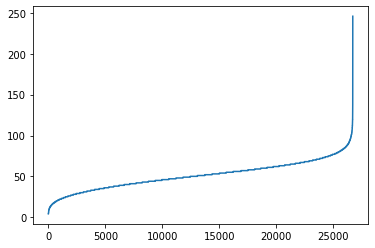

85


In [22]:
xs=[]
ys=[]
current_item=1
for item in sentences:
  xs.append(current_item)
  current_item=current_item+1
  ys.append(len(item))
newys = sorted(ys)

import matplotlib.pyplot as plt
plt.plot(xs,newys)
#plt.axis([26000, 27000, 50, 250])
plt.show()

print(newys[26000])

*It seems the length of most of the words are less than 100. So, 100 could be the maximum length of the sequence*

# Tokenization

In [23]:
vocab_size = 10000
oov_token = ''
trunc_type = 'post'
padding_type = 'post'
max_length = 100

In [41]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [42]:
tokenized = tokenizer.texts_to_sequences(sentences)

In [43]:
padded = pad_sequences(tokenized, 
                       maxlen=max_length,
                       truncating=trunc_type,
                       padding=padding_type)

In [44]:
padded[:3]

array([[ 228,    1,  588, 3276, 2209,  287,   43, 2011, 2498, 8210,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [8211, 3277, 2671, 8212,  317, 2850,  173,  898,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

# Train & Test split

In [45]:
len(padded)

26709

In [46]:
train_size = 23000

In [59]:
train_sentences = padded[:train_size]
train_labels = np.array(labels[:train_size])

test_sentences = padded[train_size:]
test_labels = np.array(labels[train_size:])

In [60]:
print(train_sentences.shape)
print(train_labels.shape)

(23000, 100)
(23000,)
